In [1]:

def perform_clustering():

    customers = pd.read_csv('/content/drive/MyDrive/Customers.csv')
    transactions = pd.read_csv('/content/drive/MyDrive/Transactions.csv')


    customer_data = transactions.groupby('CustomerID').agg({
        'TotalValue': 'sum',
        'Quantity': 'sum'
    }).reset_index()
    customer_profiles = customers.merge(customer_data, on='CustomerID', how='left').fillna(0)


    scaler = StandardScaler()
    clustering_data = customer_profiles[['TotalValue', 'Quantity']]
    clustering_data_scaled = scaler.fit_transform(clustering_data)


    kmeans = KMeans(n_clusters=4, random_state=42)
    customer_profiles['Cluster'] = kmeans.fit_predict(clustering_data_scaled)


    db_index = davies_bouldin_score(clustering_data_scaled, customer_profiles['Cluster'])
    print(f"Davies-Bouldin Index: {db_index}")


    plt.scatter(customer_profiles['TotalValue'], customer_profiles['Quantity'], c=customer_profiles['Cluster'], cmap='viridis')
    plt.title('Customer Clusters')
    plt.xlabel('Total Value')
    plt.ylabel('Quantity')
    plt.colorbar(label='Cluster')
    plt.show()

    customer_profiles.to_csv('ATTAR_SAMEER_Clustering.csv', index=False)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score


In [3]:
from google.colab import files
uploaded = files.upload()


Saving Transactions.csv to Transactions.csv
Saving Customers.csv to Customers.csv


Davies-Bouldin Index: 0.7102764046737506


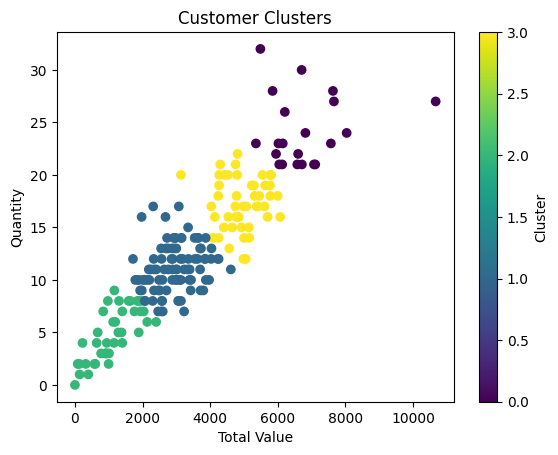

In [5]:
perform_clustering()


In [6]:
from google.colab import files
files.download('ATTAR_SAMEER_Clustering.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>